## Solving k-Nearest Neighbors with Math<br>

__k-Nearest Neighbors is a very commonly used algorithm for classification__. It works great when you have large amount of classes and a few samples per class, this is why it is very commonly used in __face recognition__.<br>
<br>
__kNN in one sentence__: is an algorithm that classifies and assigns labels based on the closest k-neighbors.<br>
<br>
k Parameter - Size of Neighborhood<br>
 - k represents the amount of neighbors to compare data with. That is why it usually k is an odd number.<br>
 - the bigger the k, the less 'defined' or more smooth are the areas of classification.<br>
<br>

__Distance__ is a key factor in order to determine who is the closest. Distance impacts the size and characteristics of the neighborhoods.  The most commonly used is Euclidean distance since it gives the closest distance between 2 points.<br>
<br>
Most Common Distances<br>
 - Euclidean: the shortest distance between to points that might not be the best option when features are normalized. Typically used in face recognition.<br>
 - Taxicab or Manhattan: is the sum of the absolute differences of the Cartesian coordinates of 2 points. It works the same way as when a car needs to move around 'blocks' to get to the destination.<br>
 - Minkowski: is a mix of both Euclidean and Mincowski.<br>

<br>
The amount of features impacts kNN significantly because the more points we have, the more 'unique' each neighborhood becomes. It also affects speed because we need to measure each distance first in order to determine who are the closest k neighbors.<br)


### The kNN Algorithm<br>

__1- Divide dataset in training/testing sets.__ Dataset has to be divided in 2, usually 80-20 or 70-30%. Each dataset has to be divided in features (x) and labels (y).<br>
__2- Create a matrix with all the distances.__ The size of the matrix is i*j where i=rows in training set and j=rows in testing set.<br>
__3- Sort the matrix by columns.__ By sorting each column we can determine which points (rows in the training set) are closer to the testing set points (represented in columns).<br>
__4- Get the indices of the top k neighbors.__ Find the points in the training set that are closer to the testing set points.<br>
__5- Get the label that repeats the most in the top k neighbors.__ Mathematically is the mode of the labels of the top k neighbors.<br>
__6- Create a new array with the projected label of the testing set.__ The size of the array is the same size as the y of the testing set.<br>
__7- Calculate accuracy of the projected labels.__ Evaluate the differences between the projected label of y in the testing set with the actual y of the testing set. If accuracy is low, we can change it by modifying k.<br>
__8- Implement algorithm.__ Model is ready to be deployed. <br>

### The following example can be used to solve 'any' type of kNN problem without knn libraries<br>

I am going to be using the 'famous' Iris Flower Dataset that you can download anywhere. If you don't know this dataset you can get more information here: https://en.wikipedia.org/wiki/Iris_flower_data_set

In [1]:
import pandas as pd
import numpy as np

In [2]:
#Load File
#I will be using pandas only to load dataset but I will not be using it to solve algorithm.
file = 'iris.data'
df = pd.read_csv(file,header = None)
print('File successfully loaded.')

File successfully loaded.


In [3]:
#1. Divide dataset in training/testing sets
df['rand'] = np.random.rand(df.shape[0],1) #create a column with random number so I can randomly create the sets
xTrain = df[df.rand <= 0.7]       #70% goes to the training set
xTest = df[df.rand > 0.7]         #30% goes to the testing set to evaluate
yTrain = np.array(xTrain[4])    #y is the last (5th) column
yTest = np.array(xTest[4])      #y is the last (5th) column
xTrain = np.array(xTrain[[0,1,2,3]])   #only use the first 4 columns since the label (y) is the fifth column
xTest = np.array(xTest[[0,1,2,3]])     #only use the first 4 columns since the label (y) is the fifth column
df=None                       #delete the dataframe I used to import the data since I created the data sets.

In [4]:
#Characteristics of the arrays
print('Dataset Shapes:')
print('xTrain -->', xTrain.shape)
print('yTrain -->', yTrain.shape)
print('xTest -->', xTest.shape)
print('yTest -->', yTest.shape)
print('\nxTrain: Top rows\n',xTrain[0:5,:])
print('\nyTrain: Top rows\n',yTrain[0:5])

Dataset Shapes:
xTrain --> (103, 4)
yTrain --> (103,)
xTest --> (47, 4)
yTest --> (47,)

xTrain: Top rows
 [[5.1 3.5 1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [5.4 3.9 1.7 0.4]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]]

yTrain: Top rows
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa']


#### Distances
Euclidean distance is calculated same way as when calculating the hypotenuse in a triangle. Euclidean distance follows the Pythagorean theorem. We have coordinateS p=(p1,p2) and q=(q1,q2), so the Euclidean distance is the square root of the difference of each point elevated to the square:<br>

__In its general form:__<br>
ED = SQRT((qi-pi)^2)<br>
<br>
__In its matrix form:__<br>
ED = SQRT((qi-pi) . transpose(qi-pi))<br>

The dot product of (qi-pi) and (qi-pi) transposed is the matrix equivalent of a function elevated to the square.<br>

__With all terms:__<br>
pi.T(pi) + qi.T(qi) - 2(qi.T(pi) <br>

Summary: we will be create 1 matrix for the first term, another matrix for the 2nd term and a 3rd matrix with the final term and then add the first 2 and substract 2 times the 3rd matrix.

In [5]:
#2- Create a matrix with all the distances.
#3- Sort the matrix by columns.
#4- Get the indices of the top k neighbors.

def knn(xTrain,xTest,k):
    """
    Finds the k nearest neighbors of xTest in xTrain.
    Input:
    xTrain = n x d matrix. n=rows and d=features
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    dists = distances between all xTrain and all XTest points. Size of n x m
    indices = k x m matrix with the indices of the yTrain labels that represent the point
    @: is the equivalent of the dot product
    """
    #the following formula calculates the Euclidean distances.
    distances = -2 * xTrain@xTest.T + np.sum(xTest**2,axis=1) + np.sum(xTrain**2,axis=1)[:, np.newaxis] 
    #because of numpy precision, some really small numbers might become negatives.
    #so, we need to replace all negative numbers with zero.
    distances[distances < 0] = 0
    distances = distances**.5
    indices = np.argsort(distances, 0) #get indices of sorted items
    distances = np.sort(distances,0) #distances sorted in axis 0
    #returning the top-k closest distances.
    return indices[0:k, : ], distances[0:k, : ]

In [6]:
k=3  #using k=3 as an example
indices, distances = knn(xTrain,xTest,k)
print('Top k Distances for Test Data Point 1:\n',distances[:,:1])
print('\nIndices of the Top k Distances\n',indices[:,:1])
print('\nLabels of Top k Distances')
for i in indices[:,:1]:
    print(yTrain[i])

Top k Distances for Test Data Point 1:
 [[0.14142136]
 [0.14142136]
 [0.17320508]]

Indices of the Top k Distances
 [[ 5]
 [31]
 [24]]

Labels of Top k Distances
['Iris-setosa']
['Iris-setosa']
['Iris-setosa']


The following function does:
 - fills up the indices matrix with their respective yTrain labels
 - calculates the mode
 - creates a final array with the predicted labels

In [7]:
def knn_predictions(xTrain,yTrain,xTest,k):
    """
    Input:
    xTrain = n x d matrix. n=rows and d=features
    yTrain = n x 1 array. n=rows with label value
    xTest = m x d matrix. m=rows and d=features (same amount of features as xTrain)
    k = number of nearest neighbors to be found
    Output:
    predictions = predicted labels, ie preds(i) is the predicted label of xTest(i,:)
    """
    yTrain = yTrain.flatten()
    rows, columns=indices.shape
    predictions=list()
    for j in range(columns):
        temp=list()
        for i in range(rows):
            cell=indices[i][j]
            temp.append(yTrain[cell])
        predictions.append(max(temp,key=temp.count)) #this is the key function, brings the mode value
    predictions=np.array(predictions)
    return predictions

In [8]:
predictions=knn_predictions(xTrain,yTrain,xTest,k)
print('Size of Predictions Array:\n',predictions.shape)
print('\nPredictions Array:\n',knn_predictions(xTrain,yTrain,xTest,k))

Size of Predictions Array:
 (47,)

Predictions Array:
 ['Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa' 'Iris-setosa'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-virginica'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor' 'Iris-versicolor'
 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-versicolor' 'Iris-virginica' 'Iris-virginica'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-versicolor'
 'Iris-virginica' 'Iris-virginica' 'Iris-virginica' 'Iris-virginica']


Now that we have the predicted array, we need to calculate its accuracy:

In [9]:
def accuracy(yTest,predictions):
    """
    Input:
    yTest = array of shape (n,) where n = rows in test set
    preds = array of shape (n,) where n = rows in test set
    Output:
    accuracy = % of correct answers in the prediction
    """
    x=yTest.flatten()==predictions.flatten()
    grade=np.mean(x)
    return np.round(grade*100,2)

print('Accuracy:',accuracy(knn_predictions(xTrain,yTrain,xTest,k),yTest),'%')

Accuracy: 93.62 %


### Validating Solution and the Best k-Value

In [10]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn import metrics
import matplotlib.pyplot as plt 

In [11]:
#will first check which is the best k
Ks = 15
mean_acc = np.zeros((Ks-1))
std_acc = np.zeros((Ks-1))
#ConfustionMx = [];
for n in range(1,Ks):    
    #Train Model and Predict
    neigh = KNeighborsClassifier(n_neighbors = n).fit(xTrain,yTrain)
    yhat=neigh.predict(xTest)
    mean_acc[n-1] = metrics.accuracy_score(yTest, yhat)    
    std_acc[n-1]=np.std(yhat==yTest)/np.sqrt(yhat.shape[0])

print( "The best accuracy was:", np.round(mean_acc.max()*100,2), "% with k=", mean_acc.argmax()+1) 

The best accuracy was: 97.87 % with k= 9


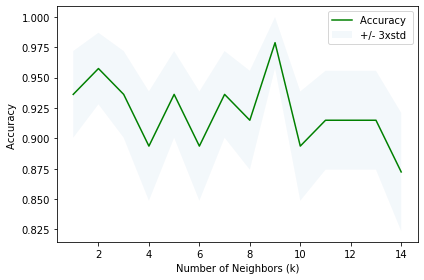

In [12]:
plt.plot(range(1,Ks),mean_acc,'g')
plt.fill_between(range(1,Ks),mean_acc - 1 * std_acc,mean_acc + 1 * std_acc, alpha=0.05)
plt.legend(('Accuracy ', '+/- 3xstd'))
plt.ylabel('Accuracy ')
plt.xlabel('Number of Neighbors (k)')
plt.tight_layout()
plt.show()

### Summary and Conclusions
 - knn works really well when a few features can really differentiate each neighborhood. Too many features, specially the ones that add noise, make kNN to have poor results and will slow down the calculations. 
 - You can use this math model to generate and evaluate any knn model.
 - Works great when you have large amount of classes and a few samples per class.